In [1]:
#bibliotecas

#Bibliotecas
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sys
##Generar un archivo PKL
import pickle 
#sys.path.insert(1, '/home/yeshua/Documentos/repositorios/T_proyect')
sys.path.insert(1, 'C:\\Users\\gojiy\\Documents\\tesis\\repositorios\\T_proyect')
import utiles

# Carga de datos

In [7]:
#WINDOWS
path_file = "E:\\MEA_data\\20230622\\datamanager\\Rebanada02\\"
#LINUX
#path_file = "/media/yeshua/ZEILER/T_proyect/20230622/datamanager/Rebanada02/"

namefile = "L6.h5" #L6 -> 88
start = 90000
finish = 95000

#RAW file
file_raw = h5py.File(path_file+namefile)
signal_electrode = np.array(file_raw['Data']['Recording_0']['AnalogStream']['Stream_0']['ChannelData'][0])
size_signal = len(signal_electrode)
st_1s = utiles.StiGen(size_signal, 10000, 9, 1000, 0, 1)

x = np.arange(0,size_signal)[start:finish]
y = signal_electrode[start:finish]
z = st_1s[start:finish]*400

print("Tamaño señal (puntos): {}".format(size_signal))

#Spikes data

namefile = "OPTOa20230622s02_SPK.h5"
file_spk = h5py.File(path_file + namefile)
segments = file_spk['Data']['Recording_0']['SegmentStream']['Stream_0']
keys = list(segments.keys())

'''Electrodos con mas de 100 spikes'''
min_num_spikes = 100
print()
keys_ts = []
for i in range(0, len(keys)):
    if "SegmentData_ts" in keys[i] and (segments[keys[i]].shape[1] >= min_num_spikes):
        keys_ts.append(keys[i])
        print("{} : {} --> {}".format(i, keys[i], segments[keys[i]].shape[1]))
print("Número de segmentos detectados: {}".format(len(keys_ts)))

Size TTL pulse: 100000
Size signal: 6000000
Tamaño señal (puntos): 6000000

120 : SegmentData_ts_0 --> 136
123 : SegmentData_ts_100 --> 180
124 : SegmentData_ts_101 --> 223
125 : SegmentData_ts_102 --> 114
134 : SegmentData_ts_111 --> 210
138 : SegmentData_ts_115 --> 108
141 : SegmentData_ts_118 --> 1310
143 : SegmentData_ts_12 --> 197
145 : SegmentData_ts_14 --> 354
146 : SegmentData_ts_15 --> 323
149 : SegmentData_ts_18 --> 349
150 : SegmentData_ts_19 --> 125
153 : SegmentData_ts_21 --> 395
154 : SegmentData_ts_22 --> 1359
156 : SegmentData_ts_24 --> 135
157 : SegmentData_ts_25 --> 154
158 : SegmentData_ts_26 --> 127
160 : SegmentData_ts_28 --> 237
161 : SegmentData_ts_29 --> 160
163 : SegmentData_ts_30 --> 102
164 : SegmentData_ts_31 --> 419
165 : SegmentData_ts_32 --> 2240
166 : SegmentData_ts_33 --> 144
167 : SegmentData_ts_34 --> 110
170 : SegmentData_ts_37 --> 188
171 : SegmentData_ts_38 --> 111
175 : SegmentData_ts_41 --> 149
180 : SegmentData_ts_46 --> 871
185 : SegmentData_ts

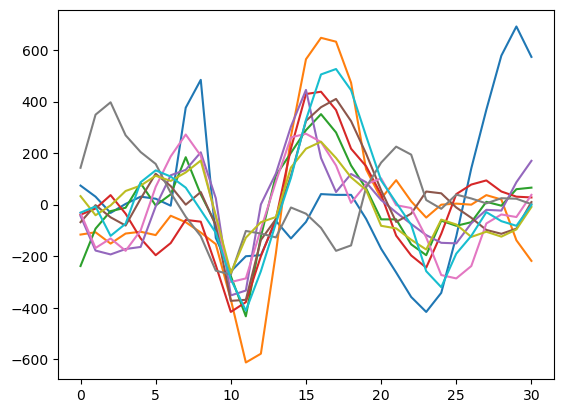

In [24]:
for i in range(0, 10):
    plt.plot(np.array(segments['SegmentData_32']).T[i])
plt.show()